In [1]:
from pathlib import Path
from astropy.io import fits
from skimage.transform import resize
import cv2
from PIL import Image
import imutils
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from scipy import signal
import scipy.stats as stats

In [2]:
#Function to build Binary
def mk_binary(Nimg, sep=-1, cont=0.5):
    if sep == -1:
        sep = Nimg//2
    o_binary = np.zeros((Nimg,Nimg))
    o_binary[Nimg//2, Nimg//2] = 1.0
    o_binary[Nimg//2, Nimg//2+sep] = cont
    return o_binary

In [3]:
dir_pup = Path('.')
sph_sam = fits.getdata(dir_pup.joinpath('SAM_IRDIS_binary_384x384px.fits'))
psf_sam = np.abs(np.fft.fftshift(np.fft.fft2(sph_sam)))**2 
otf_sam = np.fft.fftshift(np.fft.fft2(psf_sam))

In [4]:
def make_image_sam(pupil, obj, Nzoom=0):
    fig = plt.figure(1, figsize=(18,20))
    gs = gridspec.GridSpec(2,2,height_ratios=[1,1], width_ratios=[1,1])
    gs.update(left=0.01, right=0.95, bottom=0.02, top=0.75, wspace=0.3, hspace=0.30)
    
    Nimg = np.shape(pupil)[0]
    if Nzoom == 0:
        Nzoom = np.shape(pupil)[0]//2
    
    psf = np.abs(np.fft.fftshift(np.fft.fft2(pupil)))**2 
    otf = np.fft.fftshift(np.fft.fft2(psf))
    spect_obj = np.fft.fftshift(np.fft.fft2(obj))
    tfi_obj = otf * spect_obj 
    tfi_obj_crop = tfi_obj[Nimg//2-Nzoom:Nimg//2+Nzoom,Nimg//2-Nzoom:Nimg//2+Nzoom]
    img = np.abs(np.fft.ifftshift(np.fft.ifft2(tfi_obj)))

    x_crop = np.arange(-Nimg//2,Nimg//2)
    prof_otf_obj = np.abs(tfi_obj/np.max(tfi_obj))[Nimg//2,:]
    
    
    ax = plt.subplot(gs[0,0]) 
    plt.title('Image')
    im = ax.imshow((img/np.max(img))**0.1, cmap='viridis', origin='lower',interpolation='nearest')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

    ax = plt.subplot(gs[0,1]) 
    plt.title('MTF')
    im = ax.imshow(np.abs(tfi_obj_crop/np.max(tfi_obj))**0.2, cmap='viridis', origin='lower',interpolation='nearest')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

    ax = plt.subplot(gs[1,0]) 
    plt.title('Profile MTF')
    ax.plot(x_crop,prof_otf_obj, color='orange')
    plt.xlim([-2*Nzoom,2*Nzoom])
    plt.ylim([0,1])   
                                
    plt.show()

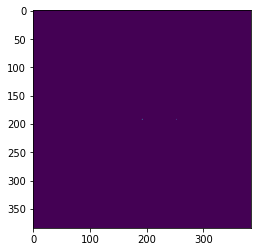

In [6]:
binary = mk_binary(384, sep=60, cont=0.5)
plt.imshow(binary)

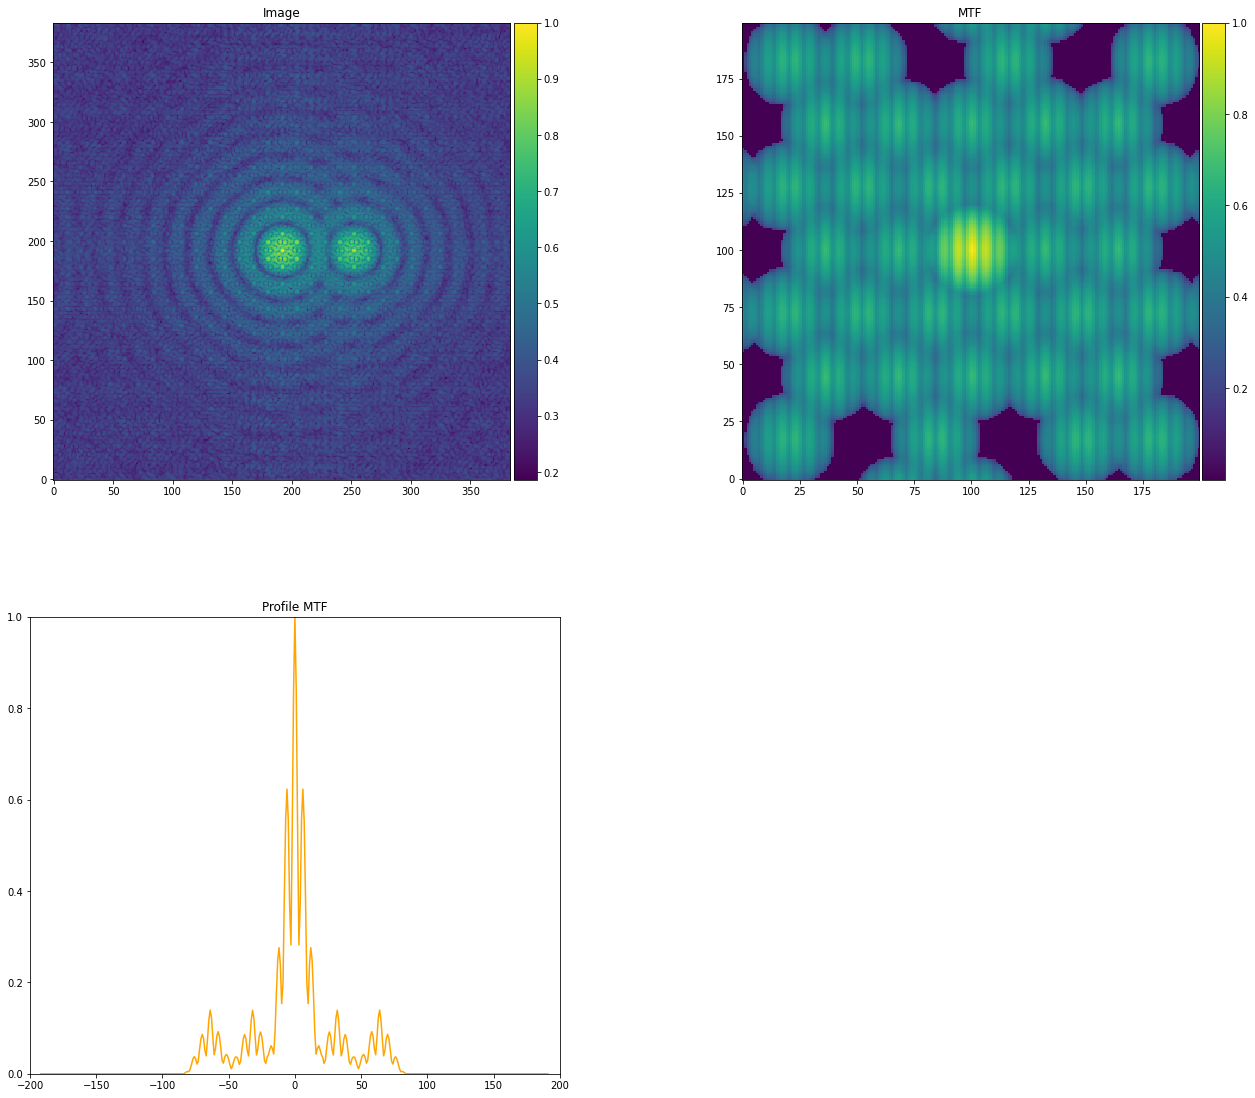

In [7]:
binary = mk_binary(384, sep=60, cont=0.5)
make_image_sam(sph_sam, binary, Nzoom=100)

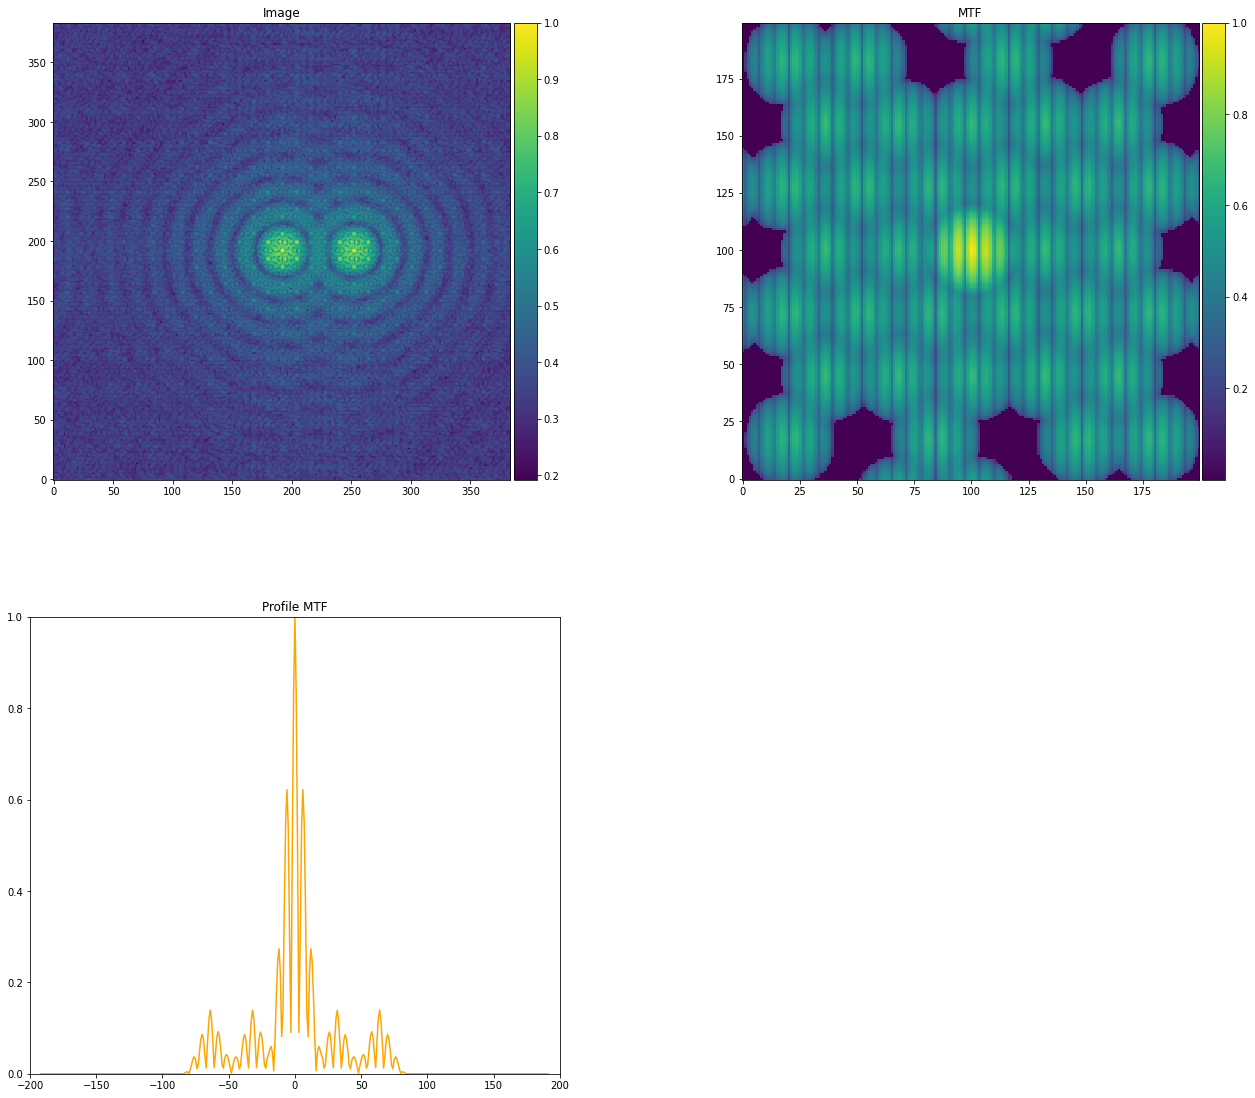

In [23]:
binary = mk_binary(384, 60, cont=0.9)
make_image_sam(sph_sam, binary, Nzoom=100)

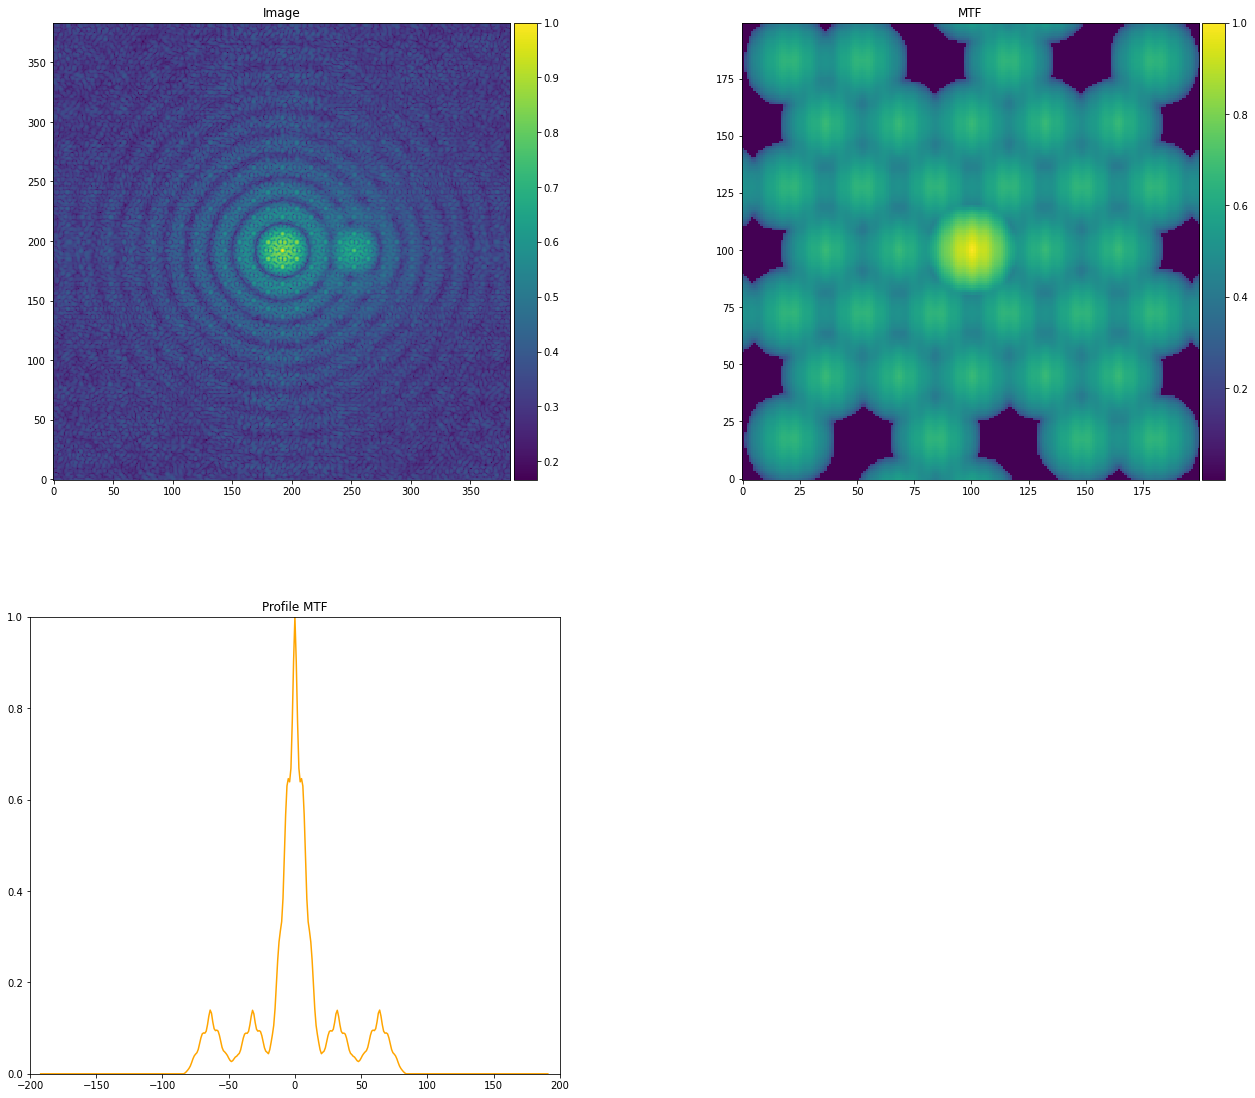

In [24]:
binary = mk_binary(384, 60, cont=0.1)
make_image_sam(sph_sam, binary, Nzoom=100)

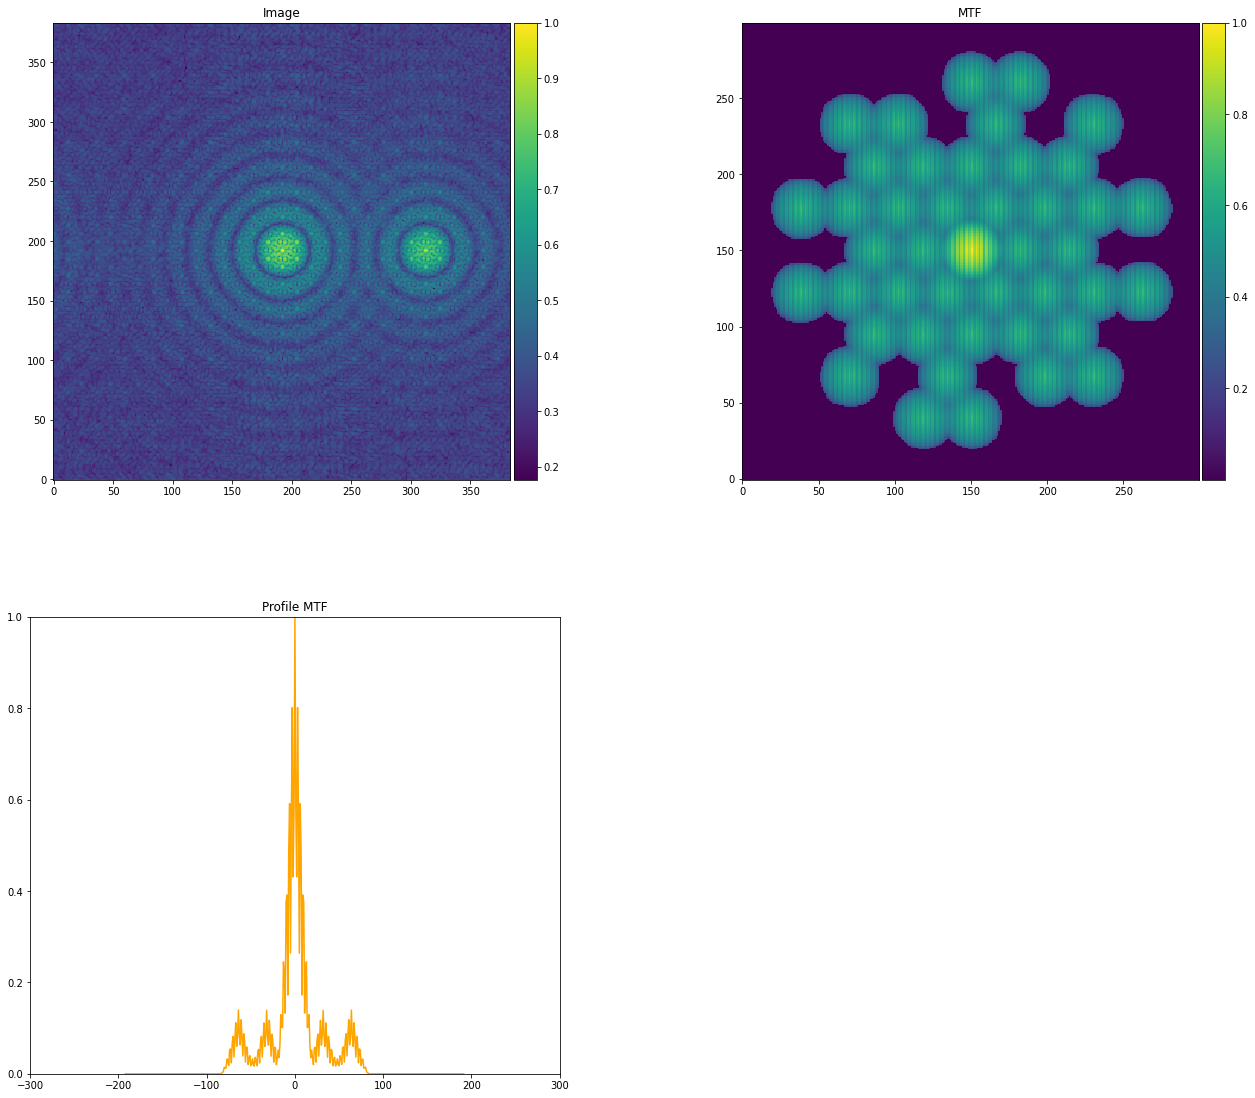

In [25]:
binary = mk_binary(384, 120, cont=0.5)
make_image_sam(sph_sam, binary, Nzoom=150)

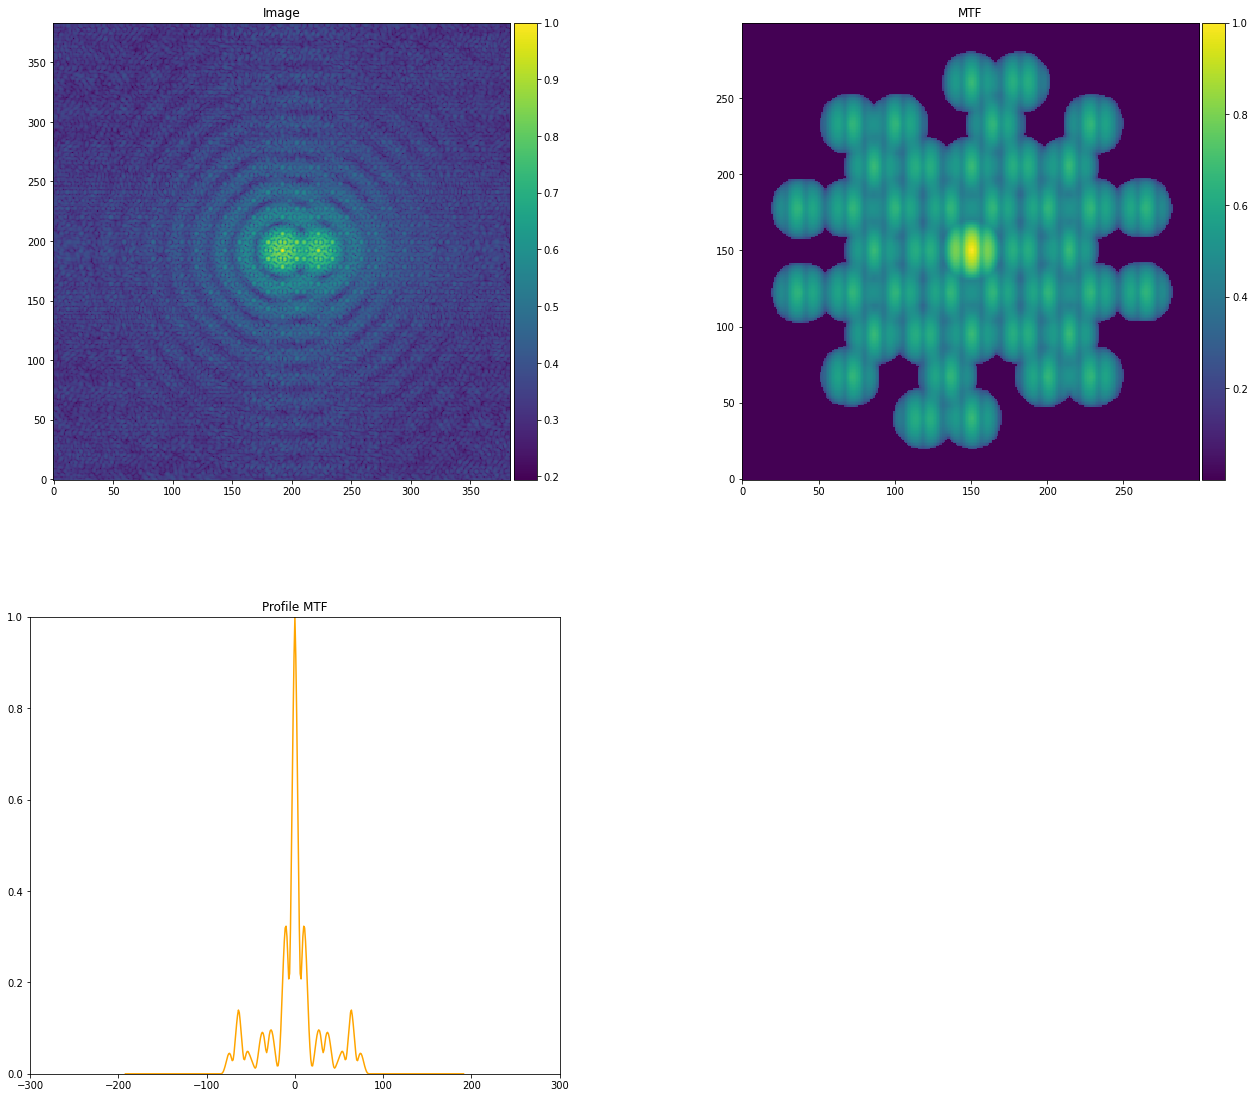

In [26]:
binary = mk_binary(384, 30, cont=0.5)
make_image_sam(sph_sam, binary, Nzoom=150)